#### Thanks for showing interest to check out my code workbook. If you find this code blocks helpful, please upvote the workbook so that it can help others. Feel free to share your thoughts in comment section. Happy Coding !!!

## **Executive Summary :**


#### 1. Best ML Model Chosen : XgBoost
#### 2. Accuracy : **81%**
#### 3. Operations Perfomed : Data pre-processing, Anomaly Detection and Treatment, EDA, Feature Selection and Model Execution

## **Introduction:**

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is described here at [Kaggle.](http://www.kaggle.com/competitions/titanic)

Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the Kaggle competition description page here. Here are the highlights to note.

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Well, with this workbook
below tell you the analytical story of passengers who either survived or passed away through its visualization and machine learning techniques.



In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: pink;
    padding: 20px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

## **Contents of the Workbook :**

#### Step - 1: Importing Necesaary Libraries and Datasets :

#### Step - 2: Data Pre-processing and Anomaly Detection :

#### Step - 3: Analytic Data Set Creation :

#### Step - 4: Feature Selection and EDA

#### Step - 5: Creating Machine Learning Models

#### Step - 6: Comparing ML Models

#### Step - 7: Submitting Results

## **Step - 1 :** *Importing Necesaary Libraries and Datasets*

In [2]:
# Importing packages and libraries
import os 
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix


In [3]:
# Importing datasets and crearing objects

gender_sub = pd.read_csv("../input/titanic/gender_submission.csv")
titan_train = pd.read_csv("../input/titanic/train.csv")
titan_test = pd.read_csv("../input/titanic/test.csv")


In [4]:
gender_sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
print("Total rows present = ", len(titan_train))
titan_train.head(5)

Total rows present =  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("Total rows present = ", len(titan_test))
titan_test.head(5)

Total rows present =  418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Note: Difference in data schema observed between Test and Train dataset as Train dataset consists of an extra column called "Survived"

## **Step - 2 :** *Data Pre-processing and Anomaly Detection*

### **Step - 2.1 :** Data Pre-Processing

In [7]:
# Dropping Survived column from Train dataset so that both test and train datasets can be combined together for the ease of data pre-processing and anomaly detection

titan_train_cl = titan_train  # Cloning train dataset to avoid data tampering
y_train = titan_train_cl.Survived
titan_train_cl.drop(['Survived'], axis = 1, inplace = True) # Dropping extra column
titan_train_cl.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Note: Similar schema achevied between train and test dataset. Lets combine both the datasets to create our merged dataset

In [8]:
# Combing both test and train datasets for merged dataset creation
# Here data schema betwee the two datasets are exactly similar. Hence we can use concat() to merge rows

merged_data = pd.concat([titan_train_cl,titan_test], axis = 0, ignore_index= True)
print("Total rows present = ", len(merged_data))
merged_data.head(5)


Total rows present =  1309


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**QC :** Total number of rows between Train and Test should match with total rows of merged_data. (891 + 418) = 1309. Result: **PASSED**

In [9]:
merged_data.info() # Checking data type information for validation purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


**Observation :** Age, Cabin, Fare, Embarked may contain nulls

In [10]:
merged_data.describe() # Taking an overview of continuous variables (Age, Fare, etc.)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


**Observation :** It seems data contains some anomalous points. Because, There are Age like 0.17, Fare = 0, etc

In [11]:
# Confirming presence of missing values in each variable

merged_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Observation: High Nulls observed in Cabin and Age

Treating Nulls in the above mentioned columns:

In [12]:
# Converting all Nulls to N/A

merged_data['Cabin'].fillna('N/A', inplace = True)

**Note :** This is to highlight that no null rows for 'Cabin' column has been removed. This is because, the nulls are quite high in number and we cant just remove the rows directly as that will impact the overall dataset and modelling outputs in future. Hence we have replaced the nulls with string named 'N/A' so that we can explore the possibility of "Cabin" as a potential predictor of "Survival" in later stage


In [13]:
# Valoidating correct data manipulation in merged_data

cabin_distr = merged_data.groupby("Cabin").size().sort_values(ascending = False)
cabin_distr

Cabin
N/A                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
B96 B98               4
                   ... 
B82 B84               1
B80                   1
B79                   1
B73                   1
T                     1
Length: 187, dtype: int64

**QC :** N/A = 1014 which matches count of Null values in Cabin column previously. Result: **PASSED**

In [14]:
# Replacing the missing values of the embarked column with the mode of the column:

merged_data['Embarked'].fillna((merged_data['Embarked'].mode()[0]), inplace = True)

In [15]:
# Replacing missing values in Age column with the median of column

merged_data['Age'].fillna((merged_data['Age'].median()), inplace = True)

In [16]:
# Replacing missing values in Fare column with the mean of column

merged_data['Fare'].fillna((merged_data['Fare'].mean()), inplace = True)

In [17]:
# Validating any presence of Nulls after missing data manipulation

merged_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Note:** No Nulls present

In [18]:
age_anom_check = merged_data.query("Age % 1 != 0")
print("Number of Age anomalous cases:", len(age_anom_check))
age_anom_check


Number of Age anomalous cases: 45


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.229200,N/A,C
78,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.000000,N/A,S
111,112,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.454200,N/A,C
116,117,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.750000,N/A,Q
122,123,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.070800,N/A,C
123,124,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.000000,E101,S
148,149,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.000000,F2,S
152,153,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.050000,N/A,S
153,154,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.500000,N/A,S
203,204,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.225000,N/A,C


Observation: 
* Age can't have decimal values
* Some cases include age as 0.33 or 0.75 which are assumed to be incorrect data

Assumptions:
* Case such as 0.33 or 0.75 are actually 33 or 75 respectively
* Rest all will be rounded to the nearest whole number

### **Step - 2.2 :** Anomaly Treatment - Age

In [19]:
def age_treatment(Age): # Creating a user-defined function for treating Age
    Age_mod = [] # Array declartion
    if Age < 1: 
        Age_mod = str(Age).split('.')[1] # Considering values after decimal poiint
        Age_mod = int(Age_mod) # Converting to int type
    else:
        Age_mod = int(Age) # Converting to int type

    return Age_mod


age_manipulated = [age_treatment(Age) for Age in merged_data.Age] # Function call
age_manipulated

value = merged_data # Cloning merged_data to avoid data tampering

value.insert(3, "Age_mod", age_manipulated) # Adding new column in data-set
value.head()

,PassengerId,Pclass,Name,Age_mod,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",22,male,22.0,1,0,A/5 21171,7.2500,N/A,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",26,female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",35,male,35.0,0,0,373450,8.0500,N/A,S


**Note:** New Column ('Age_mod') got created

In [20]:
value.info() # Validating data type of newly created column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age_mod      1309 non-null   int64  
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [21]:
age_anom_valid = value.query("Age % 1 != 0") # Checking Age with decimal points
print("Number of Age anomalous cases:", len(age_anom_valid))


Number of Age anomalous cases: 45


In [22]:
age_validation = value.query("Age_mod % 1 != 0")
print("Number of anomalous age data points = ", len(age_validation))

Number of anomalous age data points =  0


**QC :** Validating implementation of Age_mod column. Result : **Passed**

## Step - 3 : Analytic Data Set Creation 

### **Step - 3.1 :** Creating master dataset

In [23]:
titan_ads = value.drop(["Age"], axis = 1)
titan_ads.rename(columns={'Age_mod': 'Age'}, inplace=True)
titan_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   int64  
 4   Sex          1309 non-null   object 
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 112.6+ KB


### **Step - 3.2 :** Treated Train dataset

In [24]:
titan_fixed_train = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
titan_fixed_train.tail()

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",27,male,0,0,211536,13.00,N/A,S,0
887,888,1,"Graham, Miss. Margaret Edith",19,female,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",28,female,1,2,W./C. 6607,23.45,N/A,S,0
889,890,1,"Behr, Mr. Karl Howell",26,male,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",32,male,0,0,370376,7.75,N/A,Q,0


In [25]:
titan_fixed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    int64  
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


## **Step - 4 :** Feature Selection and EDA

### **Step - 4.1 :** Analysis on Pclass

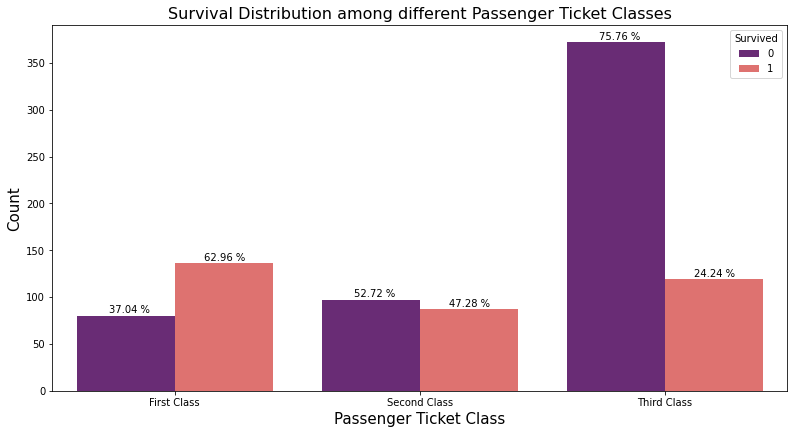

In [26]:
# Relationship between Survival and Ticket Class 

# Creating onject containing Ticket distribution
feature_pc = titan_fixed_train.groupby(by = 'Pclass')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_fixed_train, x = 'Pclass',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_pc[1][0] + 3, s = "{} %".format(((feature_pc[1][0]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_pc[1][1] + 3, s = "{} %".format(((feature_pc[1][1]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_pc[2][0] + 3, s = "{} %".format(((feature_pc[2][0]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_pc[2][1] + 3, s = "{} %".format(((feature_pc[2][1]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_pc[3][0] + 3, s = "{} %".format(((feature_pc[3][0]/feature_pc[3].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_pc[3][1] + 3, s = "{} %".format(((feature_pc[3][1]/feature_pc[3].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution among different Passenger Ticket Classes', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'], fontsize = 10)
plt.xlabel('Passenger Ticket Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()

**Observation:**
* As ticket classes increases from First Class to Third Class, survival rate also increases. Thus, it can be concluded that higher the class, more are the chances of passesnger survival
* 'Pclass' has been selected as an important feature as it has direct relationship with Survival

### **Step - 4.2 :** Analysis on Sex

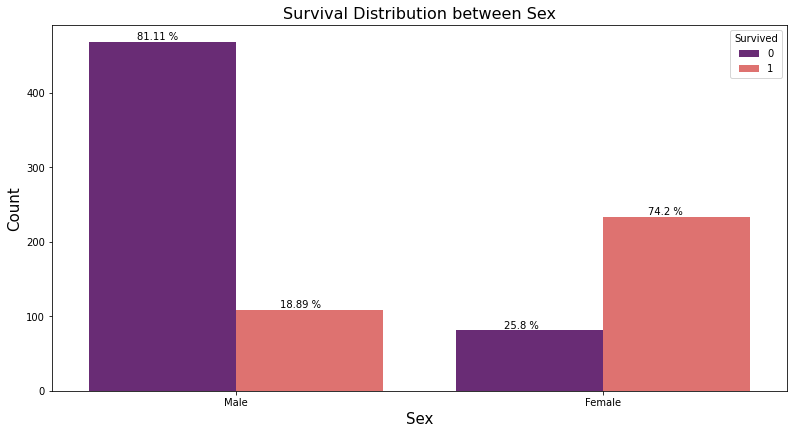

In [27]:
# Relationship between Survival and Sex 

# Creating onject containing Sex distribution
feature_sex = titan_fixed_train.groupby(by = 'Sex')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_fixed_train, x = 'Sex',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_sex['male'][0] + 3, s = "{} %".format(((feature_sex['male'][0]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_sex['male'][1] + 3, s = "{} %".format(((feature_sex['male'][1]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_sex['female'][0] + 3, s = "{} %".format(((feature_sex['female'][0]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_sex['female'][1] + 3, s = "{} %".format(((feature_sex['female'][1]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between Sex', fontsize = 16)

# Label Editing

plt.xticks([0, 1], ['Male', 'Female'], fontsize = 10)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()

**Observation:**
* Male has more survival rate in compare to Female
* 'Sex' has been selected as an important feature as it has gender specific relationship with Survival

### **Step - 4.3 :** Analysis on Embarked

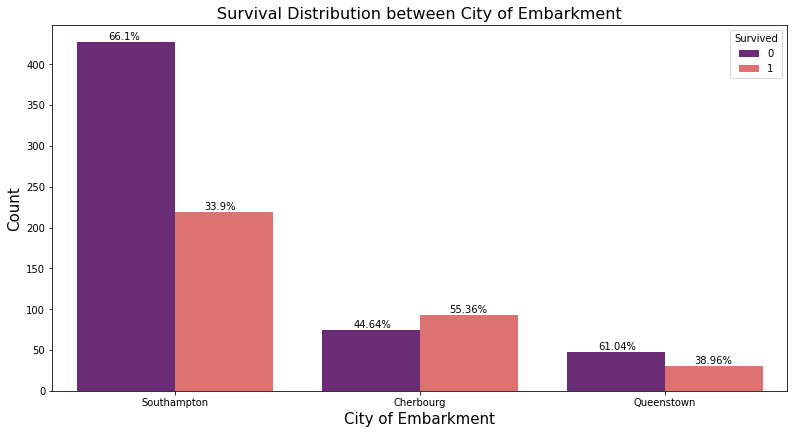

In [28]:
# Relationship between Survival and Embarked 

# Creating onject containing Embarked distribution
feature_embarked = titan_fixed_train.groupby(by = 'Embarked')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_fixed_train, x = 'Embarked',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_embarked['S'][0] + 3, s = "{}%".format(((feature_embarked['S'][0]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_embarked['S'][1] + 3, s = "{}%".format(((feature_embarked['S'][1]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_embarked['C'][0] + 3, s = "{}%".format(((feature_embarked['C'][0]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_embarked['C'][1] + 3, s = "{}%".format(((feature_embarked['C'][1]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_embarked['Q'][0] + 3, s = "{}%".format(((feature_embarked['Q'][0]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_embarked['Q'][1] + 3, s = "{}%".format(((feature_embarked['Q'][1]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between City of Embarkment', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize = 10)
plt.xlabel('City of Embarkment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()


**Observation:**
* There is a clear differemce in different cities as per survival rate
* 'Embarked' has been selected as an important feature

### **Step - 4.4 :** Analysis on Cabin

In [29]:
# Creating object containing Cabin distribution

feature_cabin = titan_fixed_train.groupby(by = 'Cabin').size().sort_values(ascending = False)
feature_cabin

Cabin
N/A            687
G6               4
C23 C25 C27      4
B96 B98          4
E101             3
              ... 
C103             1
C101             1
B94              1
B86              1
T                1
Length: 148, dtype: int64

**Observation:**
* As there are too many categorical values in cabin, no relation can be deduced w.r.t Survival
* **Next Step:** We can create a binary column with availability of cabin information as the number of N/A values are quite too high


In [30]:
titan_ads['Cabin'] = ['Present' if cabin != 'N/A' else 'Not Present' for cabin in titan_ads.Cabin]
titan_ads.head(5)

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",22,male,1,0,A/5 21171,7.2500,Not Present,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,1,0,PC 17599,71.2833,Present,C
2,3,3,"Heikkinen, Miss. Laina",26,female,0,0,STON/O2. 3101282,7.9250,Not Present,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,1,0,113803,53.1000,Present,S
4,5,3,"Allen, Mr. William Henry",35,male,0,0,373450,8.0500,Not Present,S


In [31]:
feature_cabin = titan_ads.groupby(by = 'Cabin').size().sort_values(ascending = False)
feature_cabin

Cabin
Not Present    1014
Present         295
dtype: int64

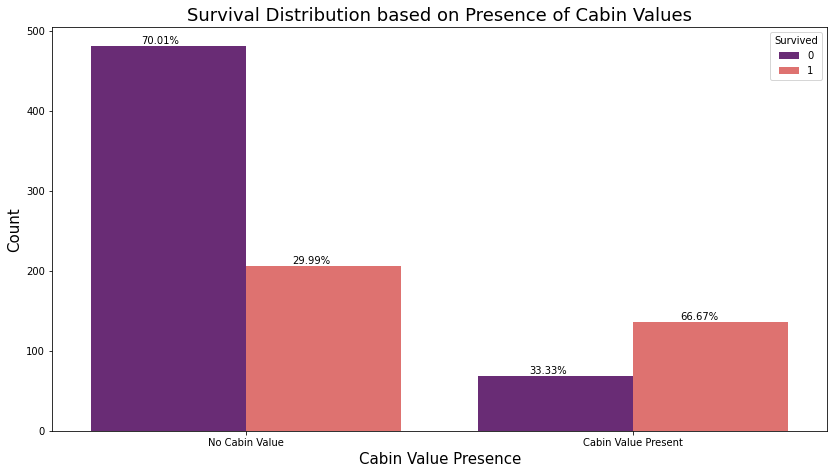

In [32]:
# Relationship between Survival and Presence of Cabin 
train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
cabSurvival = train_collated.groupby(by = 'Cabin')['Survived'].value_counts()

plt.figure(figsize = (10, 5))
sns.countplot(data = train_collated, x = 'Cabin',  hue = 'Survived', palette = 'magma')

plt.text(x = -0.27, y = cabSurvival['Not Present'][0] + 3, s = "{}%".format(((cabSurvival['Not Present'][0]/cabSurvival['Not Present'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = cabSurvival['Not Present'][1] + 3, s = "{}%".format(((cabSurvival['Not Present'][1]/cabSurvival['Not Present'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = cabSurvival['Present'][0] + 3, s = "{}%".format(((cabSurvival['Present'][0]/cabSurvival['Present'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = cabSurvival['Present'][1] + 3, s = "{}%".format(((cabSurvival['Present'][1]/cabSurvival['Present'].sum())*100).round(2)), fontsize = 10)

plt.title('Survival Distribution based on Presence of Cabin Values', fontsize = 18)
plt.xticks([0, 1], ['No Cabin Value', 'Cabin Value Present'], fontsize = 10)

plt.xlabel('Cabin Value Presence', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.tight_layout(pad = -5)
plt.show()

**Observation:**
* Significant differences can be noticed in Cabin and No-Cabin values w.r.t Survival
* 'Cabin' has been considered as an important feature for modelling

### **Step - 4.5 :** Analysis on Fare

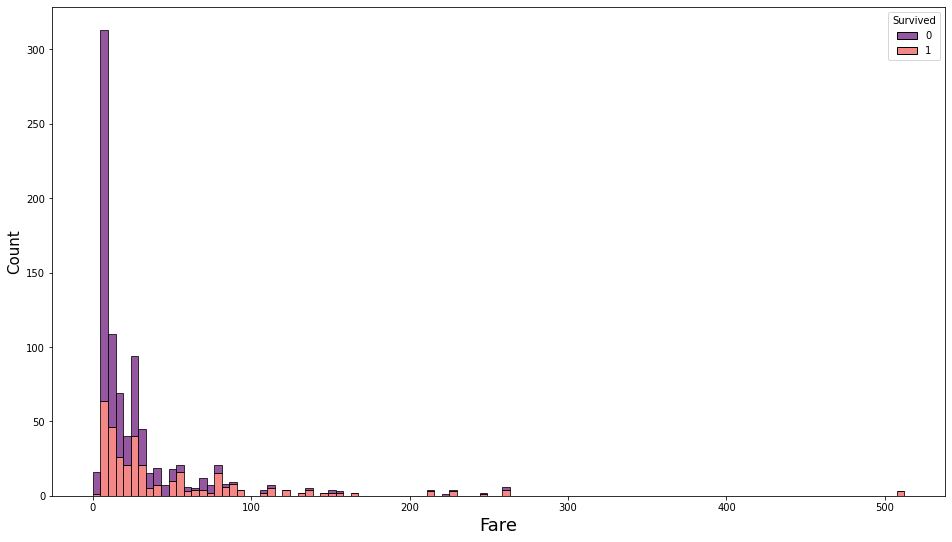

In [33]:
#Visualising the fare distribution w.r.t survival:
plt.figure(figsize = (16, 9))
sns.histplot(x = 'Fare', data = train_collated, hue = 'Survived', multiple = 'stack', palette = 'magma')
plt.xlabel('Fare', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.show()

**Observation:** : Nothing conclusive between Survuval and Fare can be deduced from the above graph

In [34]:
#Calculating the quartiles of 'Fare':

Q1 = titan_ads.Fare.quantile(0.25)
Q2 = titan_ads.Fare.quantile(0.50)
Q3 = titan_ads.Fare.quantile(0.75)

print("\n'Very Low Fare' Range:", 0, "-", Q1.round(2))
print("\n'Low Fare' Range:", Q1.round(2), "-", Q2.round(2))
print("\n'Medium Fare' Range:", Q2.round(2), "-", Q3.round(2))
print("\n'High Fare' Range:", Q3, "-", round(max(titan_ads.Fare), 2), '\n\n')

#Creating fare groups
titan_ads.insert(10, 'FareGroup', np.nan)

titan_ads.loc[(titan_ads.Fare <= Q1), 'FareGroup'] = 'VeryLowFare'
titan_ads.loc[(titan_ads.Fare > Q1) & (titan_ads.Fare <= Q2), 'FareGroup'] = 'LowFare'
titan_ads.loc[(titan_ads.Fare > Q2) & (titan_ads.Fare <= Q3), 'FareGroup'] = 'MediumFare'
titan_ads.loc[(titan_ads.Fare > Q3), 'FareGroup'] = 'HighFare'

titan_ads


'Very Low Fare' Range: 0 - 7.9

'Low Fare' Range: 7.9 - 14.45

'Medium Fare' Range: 14.45 - 31.28

'High Fare' Range: 31.275 - 512.33 




,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,FareGroup,Embarked
0,1,3,"Braund, Mr. Owen Harris",22,male,1,0,A/5 21171,7.2500,Not Present,VeryLowFare,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,1,0,PC 17599,71.2833,Present,HighFare,C
2,3,3,"Heikkinen, Miss. Laina",26,female,0,0,STON/O2. 3101282,7.9250,Not Present,LowFare,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,1,0,113803,53.1000,Present,HighFare,S
4,5,3,"Allen, Mr. William Henry",35,male,0,0,373450,8.0500,Not Present,LowFare,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",28,male,0,0,A.5. 3236,8.0500,Not Present,LowFare,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",39,female,0,0,PC 17758,108.9000,Present,HighFare,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",38,male,0,0,SOTON/O.Q. 3101262,7.2500,Not Present,VeryLowFare,S
1307,1308,3,"Ware, Mr. Frederick",28,male,0,0,359309,8.0500,Not Present,LowFare,S


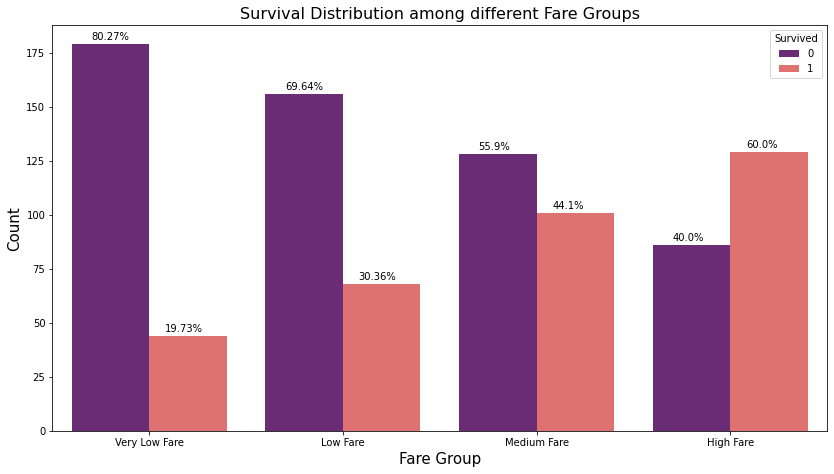

In [35]:
# Relationship between Survival and Fare Groups 

train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
fgSurvival = train_collated.groupby(by = 'FareGroup')['Survived'].value_counts()

plt.figure(figsize = (10, 5))
sns.countplot(data = train_collated, x = 'FareGroup',  hue = 'Survived', order = ['VeryLowFare', 'LowFare', 'MediumFare', 'HighFare'], palette = 'magma')

plt.text(x = -0.30, y = fgSurvival['VeryLowFare'][0] + 2, s = "{}%".format(((fgSurvival['VeryLowFare'][0]/fgSurvival['VeryLowFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.08, y = fgSurvival['VeryLowFare'][1] + 2, s = "{}%".format(((fgSurvival['VeryLowFare'][1]/fgSurvival['VeryLowFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.30 + 1, y = fgSurvival['LowFare'][0] + 2, s = "{}%".format(((fgSurvival['LowFare'][0]/fgSurvival['LowFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.08 + 1, y = fgSurvival['LowFare'][1] + 2, s = "{}%".format(((fgSurvival['LowFare'][1]/fgSurvival['LowFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.30 + 2, y = fgSurvival['MediumFare'][0] + 2, s = "{}%".format(((fgSurvival['MediumFare'][0]/fgSurvival['MediumFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.08 + 2, y = fgSurvival['MediumFare'][1] + 2, s = "{}%".format(((fgSurvival['MediumFare'][1]/fgSurvival['MediumFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.30 + 3, y = fgSurvival['HighFare'][0] + 2, s = "{}%".format(((fgSurvival['HighFare'][0]/fgSurvival['HighFare'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.08 + 3, y = fgSurvival['HighFare'][1] + 2, s = "{}%".format(((fgSurvival['HighFare'][1]/fgSurvival['HighFare'].sum())*100).round(2)), fontsize = 10)

plt.xlabel('Fare Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.xticks([0, 1, 2, 3], ['Very Low Fare', 'Low Fare', 'Medium Fare', 'High Fare'], fontsize = 10)
plt.title('Survival Distribution among different Fare Groups', fontsize = 16)

plt.tight_layout(pad = -5)
plt.show()

**Observation:**
* More the Fare, higher is the Survival rate
* 'Fare' has been considered as an important feature for modelling

### **Step - 4.6 :** Analysis on Parch and Sibsp

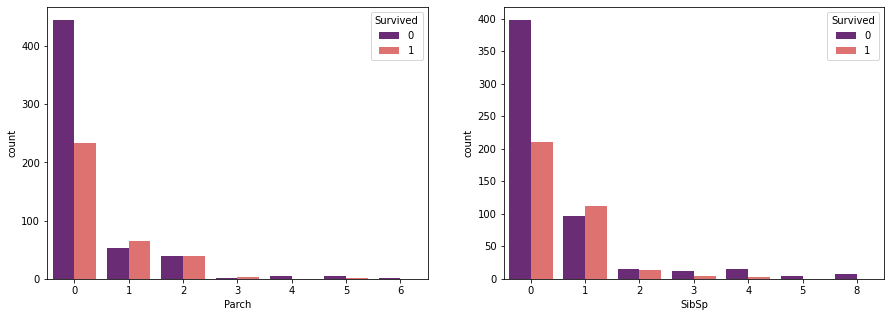

In [36]:
train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1) # Adding Survived Column in train dataset for Comaparison
cols = ['Parch', 'SibSp']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

for col, subplot in zip(cols, ax.flatten()):
    sns.countplot(data = train_collated, x = col,  hue = 'Survived', ax = subplot, palette = 'magma')
    subplot.legend(loc = 'upper right', title = 'Survived')
    
plt.show()

**Observation:** : Both Parch and SibSp shows similar Survival trends  

**Next Step :** Lets create a new variable called 'Family_Count' which will help to describe these variables better

In [37]:
#Creating FamilyCount out of Parch and SibSp:
titan_ads['FamilyCount'] = 1 + titan_ads['SibSp'] + titan_ads['Parch'] ## Passenger + Parents + Sibilings_Spose
titan_ads.head(5)

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,FareGroup,Embarked,FamilyCount
0,1,3,"Braund, Mr. Owen Harris",22,male,1,0,A/5 21171,7.2500,Not Present,VeryLowFare,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,1,0,PC 17599,71.2833,Present,HighFare,C,2
2,3,3,"Heikkinen, Miss. Laina",26,female,0,0,STON/O2. 3101282,7.9250,Not Present,LowFare,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,1,0,113803,53.1000,Present,HighFare,S,2
4,5,3,"Allen, Mr. William Henry",35,male,0,0,373450,8.0500,Not Present,LowFare,S,1


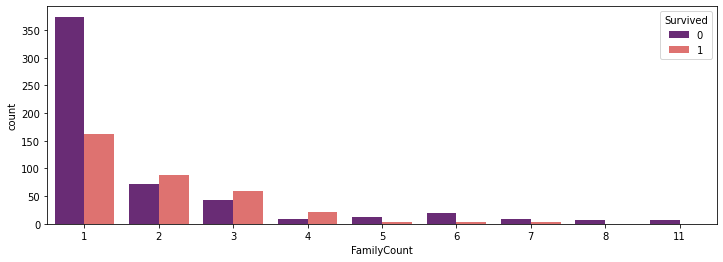

In [38]:
#Visualising number of family members w.r.t survival:
train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
plt.figure(figsize = (12, 4))
sns.countplot(data = train_collated, x = 'FamilyCount', hue = 'Survived', palette = 'magma')
plt.legend(loc = 'upper right', title = 'Survived')
plt.show()

**Observation:** : 
* When FamilyCount = 1, Survival rate is low however for FamilyCount between 2-4, there is an increase in rate of survival and the trend drops as the FamilyCount increases
* **Next Step :** Lets create groups for these Family count range buckets

In [39]:
def familygroupcreation(FG): # Creating a user-defined function for creating Family buckets
    FamilyGroup = [] # Array declartion
    if FG == 1 : 
        FamilyGroup = "Single" 
    if FG > 1 and FG < 5 : 
        FamilyGroup = "Medium"       
    if FG >= 5 :
        FamilyGroup = "Large"

    return FamilyGroup

Family_Group = [familygroupcreation(FG) for FG in titan_ads.FamilyCount] # Function call


titan_ads.insert(3, "FamilyGroup", Family_Group) # Adding new column in data-set

Family_Group_distr = titan_ads.groupby("FamilyGroup").size().sort_values(ascending = False)
Family_Group_distr

FamilyGroup
Single    790
Medium    437
Large      82
dtype: int64

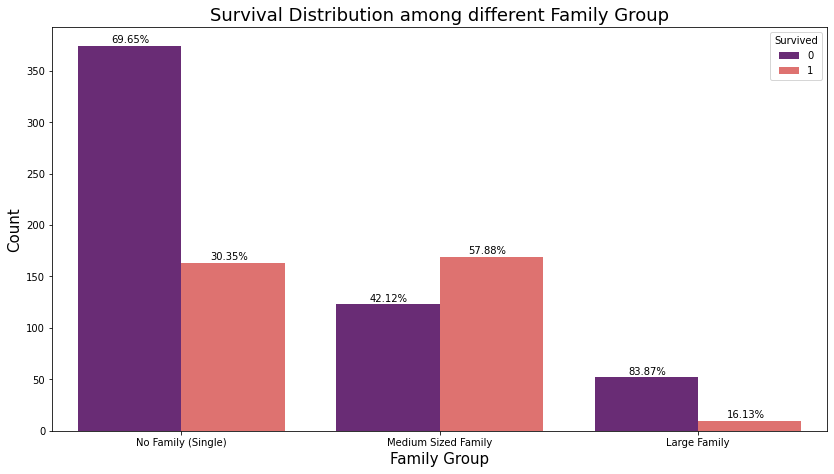

In [40]:
# Relationship between Survival and Family Groups 


train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
fsSurvival = train_collated.groupby(by = 'FamilyGroup')['Survived'].value_counts()

plt.figure(figsize = (10, 5))
sns.countplot(data = train_collated, x = 'FamilyGroup', hue = 'Survived', order = ['Single', 'Medium', 'Large'], palette = 'magma')

plt.text(x = -0.27, y = fsSurvival['Single'][0] + 3, s = "{}%".format(((fsSurvival['Single'][0]/fsSurvival['Single'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11, y = fsSurvival['Single'][1] + 3, s = "{}%".format(((fsSurvival['Single'][1]/fsSurvival['Single'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = fsSurvival['Medium'][0] + 3, s = "{}%".format(((fsSurvival['Medium'][0]/fsSurvival['Medium'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11 + 1, y = fsSurvival['Medium'][1] + 3, s = "{}%".format(((fsSurvival['Medium'][1]/fsSurvival['Medium'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = fsSurvival['Large'][0] + 3, s = "{}%".format(((fsSurvival['Large'][0]/fsSurvival['Large'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11 + 2, y = fsSurvival['Large'][1] + 3, s = "{}%".format(((fsSurvival['Large'][1]/fsSurvival['Large'].sum())*100).round(2)), fontsize = 10)

plt.xlabel('Family Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.xticks([0, 1, 2], ['No Family (Single)', 'Medium Sized Family', 'Large Family'], fontsize = 10)
plt.title('Survival Distribution among different Family Group', fontsize = 18)

plt.tight_layout(pad = -5)
plt.show()

**Observation:**
* Distinct corelation can be observed among Family Groups w.r.t Survival
* 'FamilyGroup' has been considered as an important feature for modelling

### **Step - 4.7 :** Analysis on Age

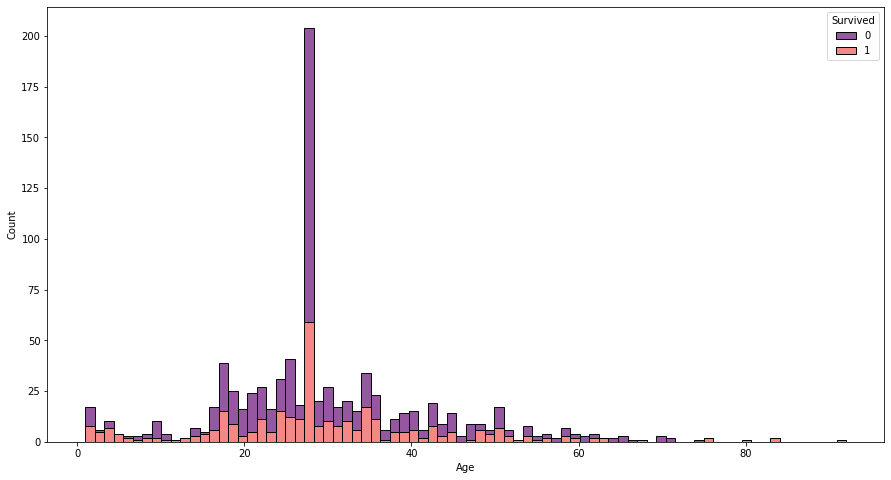

In [41]:
train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)

plt.figure(figsize = (15, 8))
sns.histplot(data = train_collated, x = 'Age', hue = 'Survived', multiple = 'stack', bins = 80, palette = 'magma')
plt.show()

**Note :** Lets create buckets to understand age better

In [42]:
def age_bucket(AG): # Creating a user-defined function for creating Age buckets
    AgeGroup = [] # Array declartion
    if AG > 0 and AG <= 18 : 
        AgeGroup = "Young" 
    if AG > 18 and AG <= 60 : 
        AgeGroup = "Adult"       
    if AG > 60 :
        AgeGroup = "Old"

    return AgeGroup

Age_Group = [age_bucket(AG) for AG in titan_ads.Age] # Function call


titan_ads.insert(3, "AgeGroup", Age_Group) # Adding new column in data-set

Age_Group_distr = titan_ads.groupby("AgeGroup").size().sort_values(ascending = False)
Age_Group_distr

AgeGroup
Adult    1083
Young     185
Old        41
dtype: int64

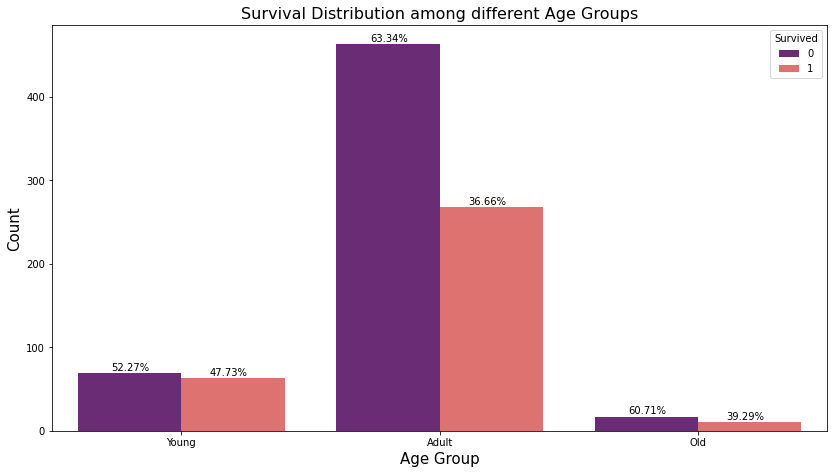

In [43]:
# Relationship between Survival and Age Groups 

train_collated = pd.concat([titan_ads.sort_index().iloc[:891], y_train], axis = 1)
agSurvival = train_collated.groupby(by = 'AgeGroup')['Survived'].value_counts()

plt.figure(figsize = (10, 5))
sns.countplot(data = train_collated, x = 'AgeGroup', hue = 'Survived', order = ['Young', 'Adult', 'Old'], palette = 'magma')

plt.text(x = -0.27, y = agSurvival['Young'][0] + 3, s = "{}%".format(((agSurvival['Young'][0]/agSurvival['Young'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11, y = agSurvival['Young'][1] + 3, s = "{}%".format(((agSurvival['Young'][1]/agSurvival['Young'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = agSurvival['Adult'][0] + 3, s = "{}%".format(((agSurvival['Adult'][0]/agSurvival['Adult'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11 + 1, y = agSurvival['Adult'][1] + 3, s = "{}%".format(((agSurvival['Adult'][1]/agSurvival['Adult'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = agSurvival['Old'][0] + 3, s = "{}%".format(((agSurvival['Old'][0]/agSurvival['Old'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.11 + 2, y = agSurvival['Old'][1] + 3, s = "{}%".format(((agSurvival['Old'][1]/agSurvival['Old'].sum())*100).round(2)), fontsize = 10)

plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.xticks([0, 1, 2], ['Young', 'Adult', 'Old'], fontsize = 10)
plt.title('Survival Distribution among different Age Groups', fontsize = 16)

plt.tight_layout(pad = -5)
plt.show()

**Observation:**
* As age increases, rate of survival decreases
* 'AgeGroup' has been considered as an important feature for modelling

**Note :** Passenger_Id, Name and Ticket were not selected as necessary features because they donot share distinct relatioship with Survival

### **Step - 4.8 :** Selecting Important Features

In [44]:
titan_features = titan_ads # Cloning to avoid any data tampering

titan_features.drop(['PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp', 'FamilyCount', 'Fare', 'Age'], axis  = 1, inplace = True) # Dropping all the unnecessary features
titan_features.head(5)

,Pclass,AgeGroup,FamilyGroup,Sex,Cabin,FareGroup,Embarked
0,3,Adult,Medium,male,Not Present,VeryLowFare,S
1,1,Adult,Medium,female,Present,HighFare,C
2,3,Adult,Single,female,Not Present,LowFare,S
3,1,Adult,Medium,female,Present,HighFare,S
4,3,Adult,Single,male,Not Present,LowFare,S


**Step - 4.9 :** Encoding

In [45]:
titan_encoded_features = pd.get_dummies(titan_features, drop_first = False) # Encoding categorical variables
titan_encoded_features.head(5)

,Pclass,AgeGroup_Adult,AgeGroup_Old,AgeGroup_Young,FamilyGroup_Large,FamilyGroup_Medium,FamilyGroup_Single,Sex_female,Sex_male,Cabin_Not Present,Cabin_Present,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,FareGroup_VeryLowFare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1


**Step - 4.10 :** Finding Corelation among Important Features

<AxesSubplot:>

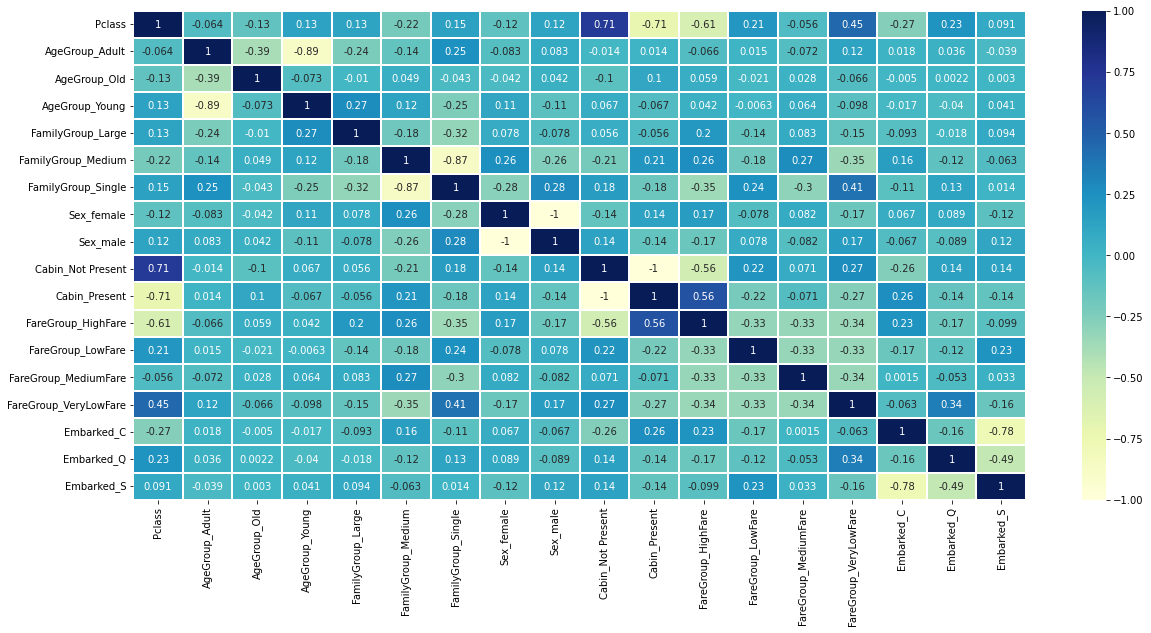

In [46]:
corrmat = titan_encoded_features.corr()
  
f, ax = plt.subplots(figsize =(20, 9))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

In [47]:
# Droppinbg some unnecesary encoded features

titan_encoded_features.drop(['Sex_male', 'Cabin_Not Present'], axis = 1, inplace = True)
titan_encoded_features.head(5)

,Pclass,AgeGroup_Adult,AgeGroup_Old,AgeGroup_Young,FamilyGroup_Large,FamilyGroup_Medium,FamilyGroup_Single,Sex_female,Cabin_Present,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,FareGroup_VeryLowFare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [48]:
#Scaling the independent features:
scaler = StandardScaler()
scaler.fit(titan_encoded_features)
X = scaler.fit_transform(titan_encoded_features)

## **Step - 5 :** Creating Machine Learning Models

In [49]:
#Splitting the transformed data back into training and testing sets:
titan_train_final = X[:891]
titan_test_final = X[891:]

### **Step - 5.1 :** Spliting train data into test-train to feed in model

In [50]:
X_train, X_test, y_train, y_test = train_test_split(titan_train_final, y_train, test_size = 0.20, random_state = 42) # test-train: 80-20 split

### **Step - 5.2 :** Logistic Regression

In [51]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix : \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classification Report : \n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.8103932584269663
Test Accuracy of Logistic Regression is 0.7821229050279329
Confusion Matrix : 
 [[86 19]
 [20 54]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### **Step - 5.3 :** Decision Tree Classifier

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report : \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.8693820224719101
Test Accuracy of Decision Tree Classifier is 0.7932960893854749 

Confusion Matrix : 
[[88 17]
 [20 54]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



### **Step - 5.4 :** Random Forest Classifier

In [53]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report : \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.8693820224719101
Test Accuracy of Random Forest Classifier is 0.8044692737430168 

Confusion Matrix : 
[[89 16]
 [19 55]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



### **Step - 5.5 :** Gradient Boosting Classifier

In [54]:
gb = GradientBoostingClassifier() #
gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report : \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.8553370786516854
Test Accuracy of Gradient Boosting Classifier is 0.7877094972067039 

Confusion Matrix : 
[[87 18]
 [20 54]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### **Step - 5.6 :** Xg Boost Classifier

In [55]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report : \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.8693820224719101
Test Accuracy of XgBoost is 0.8100558659217877 

Confusion Matrix : 
[[89 16]
 [18 56]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## **Step - 6 :** Comparing ML Models

In [56]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'XgBoost'],
    'Score' : [lr_acc, dtc_acc, rd_clf_acc, gb_acc, xgb_acc]
})

models["Score"] = (models["Score"] * 100).round(2)

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,XgBoost,81.01
2,Random Forest Classifier,80.45
1,Decision Tree Classifier,79.33
3,Gradient Boosting Classifier,78.77
0,Logistic Regression,78.21


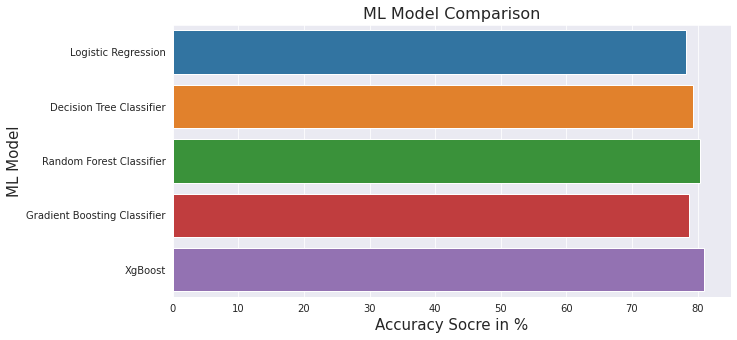

In [57]:
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Score', y = 'Model', data = models)

plt.xlabel('Accuracy Socre in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

**Note :** Xg Boost Classifier has been chosen as the best model among the above five

## **Step - 7 :** Submitting Result

In [58]:
xgb_prediction = xgb.predict(titan_test_final) 
prediction = pd.DataFrame(xgb_prediction)
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission['Survived'] = prediction
submission.to_csv('Submission.csv', index = False)